In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

## Data

In [2]:
data = pd.read_csv('../../../youtube/algo_trad_ml_quant_strat_freecodecamp/sp500_data.csv',
                   index_col=0, parse_dates=True, header=[0, 1])
data.head()

Adj Close                                                   \
                    A        AAL       AAPL       ABBV ABNB        ABT   
Date                                                                     
2015-09-29  31.588039  37.361626  24.716064  37.024632  NaN  33.807274   
2015-09-30  32.140408  37.027870  24.997087  38.160828  NaN  34.423519   
2015-10-01  31.588039  37.380699  24.833916  38.665810  NaN  34.885685   
2015-10-02  32.458721  36.837147  25.015219  39.149734  NaN  35.416328   
2015-10-05  33.085987  38.324741  25.105864  39.752911  NaN  35.424885   

                                                        ...    Volume  \
                 ACGL        ACN       ADBE        ADI  ...      WYNN   
Date                                                    ...             
2015-09-29  24.416668  84.097511  79.830002  45.767231  ...   6223400   
2015-09-30  24.490000  85.542664  82.220001  47.765575  ...   4265300   
2015-10-01  24.463333  85.699379  83.750000  46.520844  ...   4745600   
2015-10-02  24.780001  86.526428  83.989998  47.155910  ...  15153700   
2015-10-05  24.993334  88.467812  85.839996  48.629261  ...  12699700   

                                                                           \
                XEL       XOM     XRAY      XYL      YUM      ZBH    ZBRA   
Date                                                                        
2015-09-29  3361700  13754400  1073500  1344100  6018857  2358906  895000   
2015-09-30  2722000  18176500  1558100  1708500  7378142  2012723  618800   
2015-10-01  2875200  14397800  1378600  1498600  4426718  1604019  464900   
2015-10-02  3299500  18811300  1791800  1451100  7719772  1353626  341500   
2015-10-05  5369400  18486700  2245000  2376800  5737736  1352081  460600   

                              
               ZION      ZTS  
Date                          
2015-09-29  2958200  7328400  
2015-09-30  3514200  4954100  
2015-10-01  2795500  4131800  
2015-10-02  3315700  4036800  
2015-10-05  1924800  5467700  

[5 rows x 3018 columns]

In [3]:
set(data.columns.get_level_values(0))

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

In [4]:
len(set(data.columns.get_level_values(1)))

503

In [5]:
data.iloc[0].name, data.iloc[-1].name

(Timestamp('2015-09-29 00:00:00'), Timestamp('2023-09-26 00:00:00'))

In [3]:
sp500_df = pd.read_csv('../data/^GSPC_2015-09-29_2023-09-26_1d.csv', index_col=0, header=[0, 1])
sp500_df = sp500_df.droplevel(level='Ticker', axis=1)
sp500_df.drop(['Dividends', 'Stock Splits'], inplace=True, axis=1)
sp500_df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2015-09-29,1884.089966,1899.479980,1871.910034,1881.900024,4132390000
2015-09-30,1920.030029,1920.530029,1887.140015,1887.140015,4525070000
2015-10-01,1923.819946,1927.209961,1900.699951,1919.650024,3983600000
2015-10-02,1951.359985,1951.359985,1893.699951,1921.770020,4378570000
2015-10-05,1987.050049,1989.170044,1954.329956,1954.329956,4334490000


## Returns

In [4]:
sp500 = pd.DataFrame(sp500_df['Close'])
sp500['return'] = np.log(sp500['Close'] / sp500['Close'].shift(1))
sp500['cumm_return'] = sp500['return'].cumsum().apply(np.exp)
sp500.dropna(axis=0, inplace=True)
sp500.index = pd.to_datetime(sp500.index)
sp500.head()

,Close,return,cumm_return
Date,,,
2015-09-30,1920.030029,0.018896,1.019076
2015-10-01,1923.819946,0.001972,1.021087
2015-10-02,1951.359985,0.014214,1.035704
2015-10-05,1987.050049,0.018125,1.054647
2015-10-06,1979.920044,-0.003595,1.050863


In [5]:
tickers = data['Adj Close'].copy()
for col in tickers.columns:
    tickers[f'{col}_return'] = np.log(tickers[col] / tickers[col].shift(1))
    tickers[f'{col}_cumm_return'] = tickers[f'{col}_return'].cumsum().apply(np.exp)

tickers.drop(index=tickers.index[0], inplace=True)
tickers.head()

<ipython-input-5-955d7be07624>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  tickers[f'{col}_cumm_return'] = tickers[f'{col}_return'].cumsum().apply(np.exp)
<ipython-input-5-955d7be07624>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  tickers[f'{col}_return'] = np.log(tickers[col] / tickers[col].shift(1))


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,YUM_return,YUM_cumm_return,ZBH_return,ZBH_cumm_return,ZBRA_return,ZBRA_cumm_return,ZION_return,ZION_cumm_return,ZTS_return,ZTS_cumm_return
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-30,32.140408,37.027870,24.997087,38.160828,NaN,34.423519,24.490000,85.542664,82.220001,47.765575,...,0.048696,1.049902,0.001492,1.001493,0.058366,1.060103,0.005827,1.005844,0.037862,1.038588
2015-10-01,31.588039,37.380699,24.833916,38.665810,NaN,34.885685,24.463333,85.699379,83.750000,46.520844,...,-0.001001,1.048851,0.000319,1.001813,0.004041,1.064396,-0.000363,1.005478,0.002667,1.041362
2015-10-02,32.458721,36.837147,25.015219,39.149734,NaN,35.416328,24.780001,86.526428,83.989998,47.155910,...,0.021429,1.071569,0.013846,1.015780,0.024039,1.090292,-0.007657,0.997809,0.041045,1.084994
2015-10-05,33.085987,38.324741,25.105864,39.752911,NaN,35.424885,24.993334,88.467812,85.839996,48.629261,...,0.017613,1.090611,0.002411,1.018232,0.011743,1.103171,0.019573,1.017531,-0.003959,1.080706
2015-10-06,32.674053,36.360359,25.225985,38.630745,NaN,34.141060,24.833332,88.363335,85.150002,48.172020,...,0.004445,1.095470,-0.015938,1.002132,-0.019266,1.082122,0.009645,1.027392,-0.034666,1.043884


In [11]:
tickers.shape, sp500['return'].shape

((2011, 1509), (2010,))

In [6]:
diff_idx = tickers.index.difference(sp500.index)
diff_idx

DatetimeIndex(['2023-09-26'], dtype='datetime64[ns]', name='Date', freq=None)

In [7]:
tickers.loc[diff_idx]

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,YUM_return,YUM_cumm_return,ZBH_return,ZBH_cumm_return,ZBRA_return,ZBRA_cumm_return,ZION_return,ZION_cumm_return,ZTS_return,ZTS_cumm_return
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-26,110.507202,12.7,171.733749,152.384705,132.279999,95.700241,81.260002,309.327057,506.299988,172.339996,...,-0.007711,2.630932,-0.042563,1.312574,-0.018536,3.10151,-0.017209,1.509606,-0.004794,4.712618


In [8]:
tickers.drop(diff_idx, axis=0, inplace=True)

In [12]:
tickers.shape, sp500['return'].shape

((2010, 1509), (2010,))

In [9]:
tickers_list = list(set(data.columns.get_level_values(1)))
tickers_return_list = [ticker+'_return' for ticker in tickers_list]
tickers_cum_return_list = [ticker+'_cumm_return' for ticker in tickers_list]

## Visualization

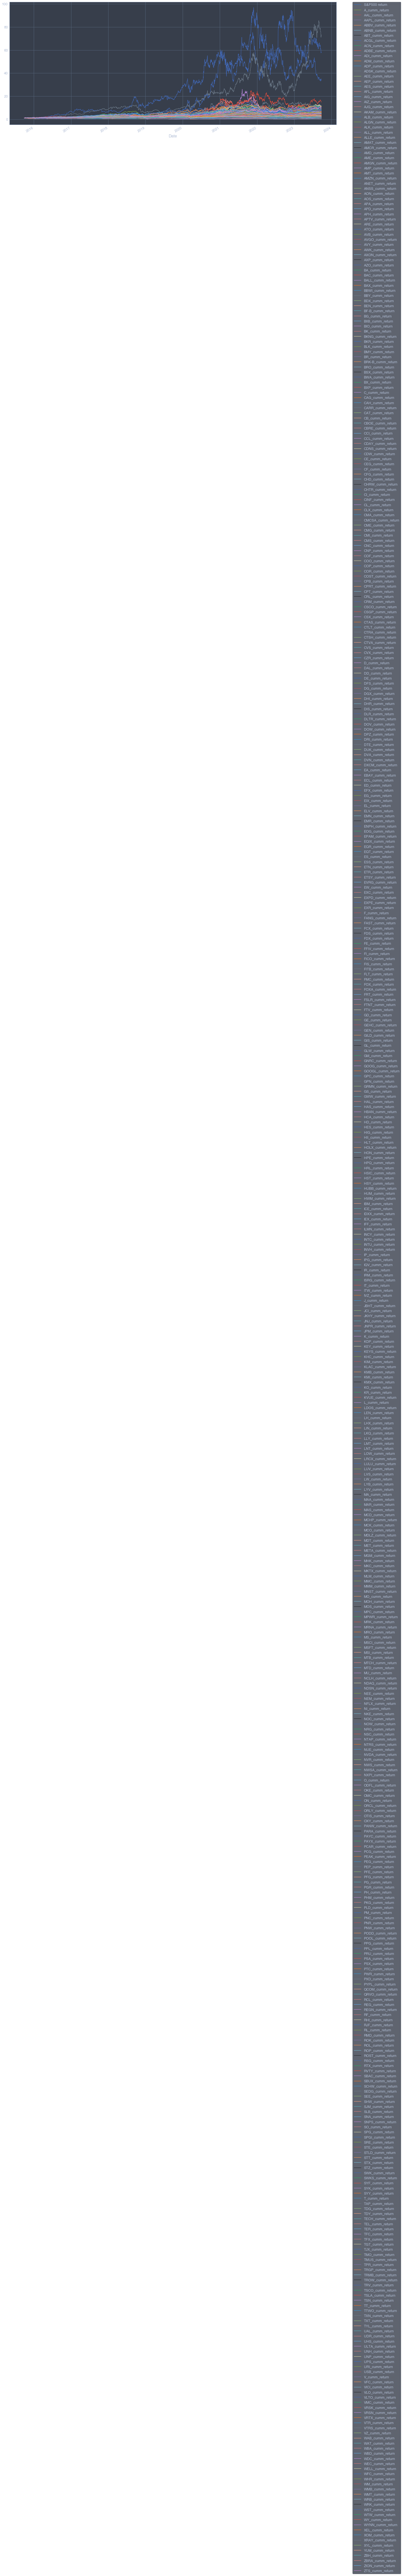

In [19]:
fig, ax = plt.subplots(1, figsize=(21, 9))
sp500['cumm_return'].plot(ax=ax, label='S&P500 return')
for ticker in data['Adj Close'].columns:
    tickers[f'{ticker}_cumm_return'].plot(ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Research

In [10]:
for ticker in tickers_return_list:
    t = ticker.split('_')[0]
    tickers[f'{t}_compare'] = (tickers[ticker] > sp500['return']).astype(int)

tickers.head()

<ipython-input-10-aad457bf89a5>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  tickers[f'{t}_compare'] = (tickers[ticker] > sp500['return']).astype(int)


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,NKE_compare,ILMN_compare,CMS_compare,PNR_compare,HRL_compare,LYB_compare,FTV_compare,WMB_compare,DHR_compare,ALLE_compare
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-30,32.140408,37.027870,24.997087,38.160828,NaN,34.423519,24.490000,85.542664,82.220001,47.765575,...,1,1,1,0,1,1,0,1,1,1
2015-10-01,31.588039,37.380699,24.833916,38.665810,NaN,34.885685,24.463333,85.699379,83.750000,46.520844,...,1,0,0,0,0,1,0,1,0,1
2015-10-02,32.458721,36.837147,25.015219,39.149734,NaN,35.416328,24.780001,86.526428,83.989998,47.155910,...,0,1,1,1,1,1,0,1,1,0
2015-10-05,33.085987,38.324741,25.105864,39.752911,NaN,35.424885,24.993334,88.467812,85.839996,48.629261,...,0,0,0,1,0,1,0,0,0,0
2015-10-06,32.674053,36.360359,25.225985,38.630745,NaN,34.141060,24.833332,88.363335,85.150002,48.172020,...,0,0,1,1,0,1,0,1,0,0


In [11]:
compare_cols = [ticker+'_compare' for ticker in tickers_list]

top_sp500 = tickers[compare_cols].mean()[tickers[compare_cols].mean()>0.53].index.to_list()
top_sp500 = [ticker.split('_')[0]+'_cumm_return' for ticker in top_sp500]

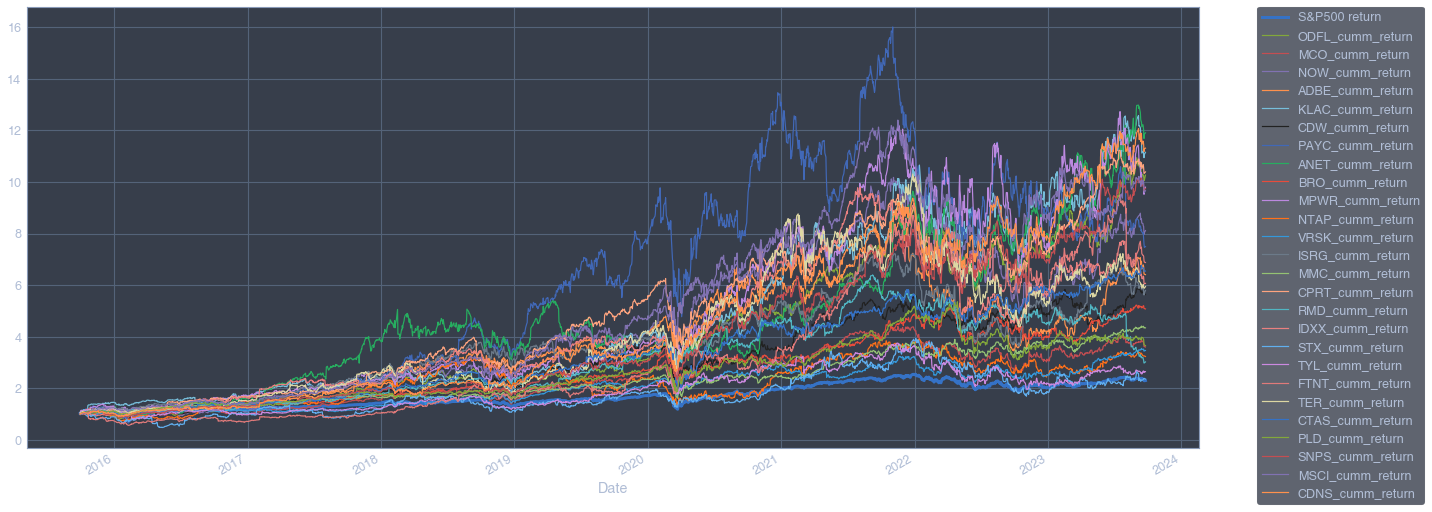

In [22]:
fig, ax = plt.subplots(1, figsize=(21, 9))
sp500['cumm_return'].plot(ax=ax, label='S&P500 return', linewidth=3)
tickers[top_sp500].plot(ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### Above S&P500 by years

In [23]:
above_sp500_by_years = {}
for year in np.arange(2016, 2024):
    above_sp500_by_years[year] = tickers.loc[str(year)][compare_cols].mean()[
                                     tickers.loc[str(year)][compare_cols].mean()>.55
                                 ].sort_values(ascending=False)

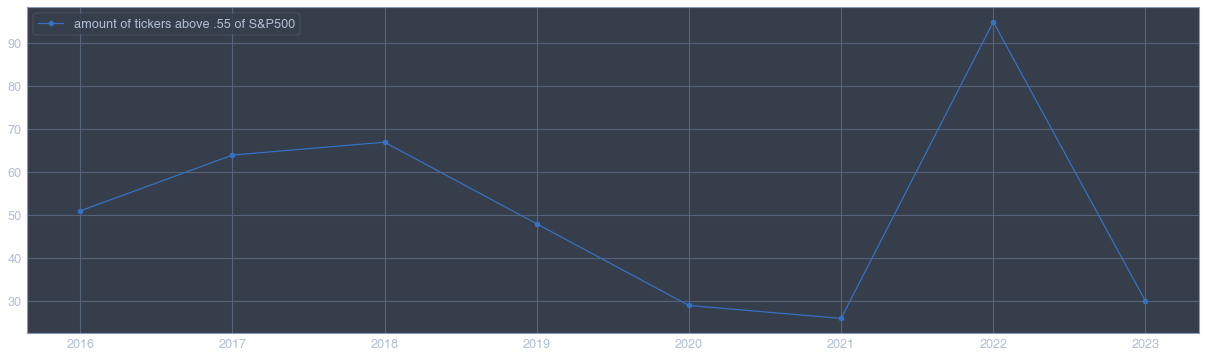

In [24]:
above_55 = [len(tickers) for tickers in above_sp500_by_years.values()]

fig = plt.figure(figsize=(21, 6))
plt.plot(np.arange(2016, 2024), above_55, marker='o', label='amount of tickers above .55 of S&P500')
plt.legend()

## Starting Position

In [12]:
tickers.dropna(axis=1, inplace=True)

In [13]:
initial_cap = 100_000

In [51]:
# GENERATE ONCE!
N = np.random.choice(np.arange(10, 21))
random_tickers = np.random.choice(tickers_list,
                                  size=N,
                                  replace=False)

weights = np.random.randint(1, 11, N)
weights = np.round(weights / sum(weights), 2)

random_portfolio = {ticker:weight for ticker, weight in zip(random_tickers, weights)}
random_portfolio

{'GPN': 0.05,
 'DFS': 0.06,
 'NUE': 0.1,
 'KIM': 0.1,
 'MMM': 0.1,
 'WY': 0.03,
 'GL': 0.04,
 'ETR': 0.08,
 'JCI': 0.1,
 'ARE': 0.06,
 'PAYX': 0.05,
 'CZR': 0.09,
 'PM': 0.05,
 'SCHW': 0.09}

In [14]:
random_portfolio = {
    'GPN': 0.05, 'DFS' : 0.06, 'NUE': 0.1,
    'KIM': 0.1,  'MMM' : 0.1,  'WY' : 0.03,
    'GL' : 0.04, 'ETR' : 0.08, 'JCI': 0.1,
    'ARE': 0.06, 'PAYX': 0.05, 'CZR': 0.09,
    'PM' : 0.05, 'SCHW': 0.09,
}

In [66]:
tickers[random_portfolio.keys()].iloc[0]

GPN      55.784492
DFS      43.523743
NUE      30.654959
KIM      16.442160
MMM     108.447609
WY       19.604715
GL       52.782074
ETR      47.040302
JCI      25.540625
ARE      66.502792
PAYX     37.410553
CZR       9.020000
PM       52.586315
SCHW     25.824799
Name: 2015-09-30 00:00:00, dtype: float64

In [32]:
init_prices = tickers[random_portfolio.keys()].iloc[0]
weights_per = np.array(list(random_portfolio.values()))*100

initial_portfolio = init_prices * pd.Series(index=random_portfolio.keys(),
                                            data=weights_per)
initial_portfolio

GPN      278.922462
DFS      261.142456
NUE      306.549587
KIM      164.421597
MMM     1084.476089
WY        58.814146
GL       211.128296
ETR      376.322418
JCI      255.406246
ARE      399.016754
PAYX     187.052765
CZR       81.180004
PM       262.931576
SCHW     232.423187
dtype: float64

In [66]:
sum(initial_portfolio)

4159.78758430481

In [67]:
random_portfolio_df = pd.DataFrame(
    columns=['portfolio'],
    data=(tickers[random_portfolio.keys()]*np.array(list(random_portfolio.values()))*100).sum(axis=1)
)
random_portfolio_df['return'] = np.log(random_portfolio_df['portfolio'] / random_portfolio_df['portfolio'].shift(1))
random_portfolio_df['cumm_return'] = random_portfolio_df['return'].cumsum().apply(np.exp)
random_portfolio_df.head()

,portfolio,return,cumm_return
Date,,,
2015-09-30,4159.787584,NaN,NaN
2015-10-01,4158.364932,-0.000342,0.999658
2015-10-02,4202.947674,0.010664,1.010376
2015-10-05,4289.130714,0.020298,1.031094
2015-10-06,4269.982732,-0.004474,1.026491


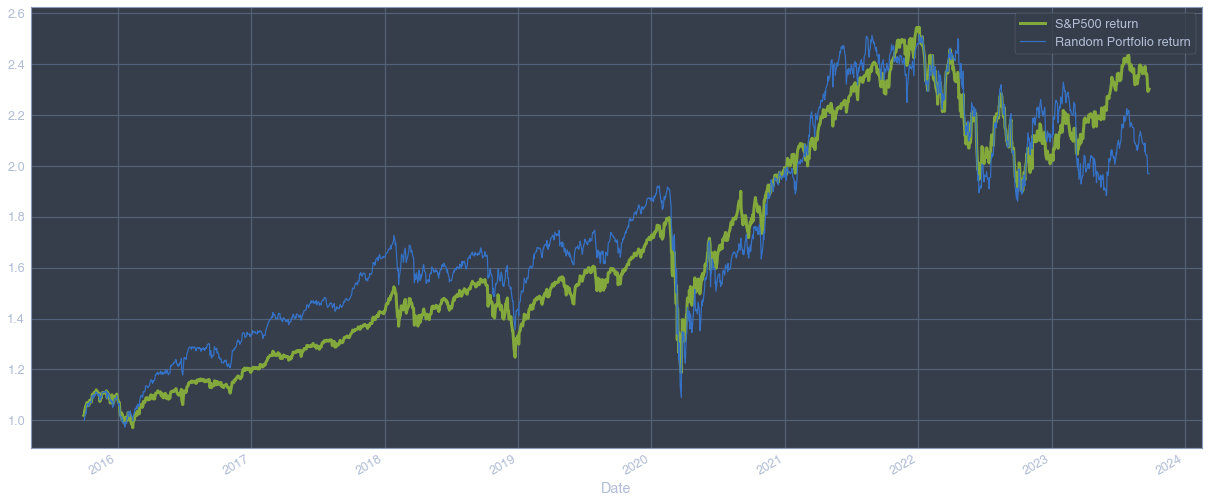

In [69]:
fig, ax = plt.subplots(1, figsize=(21, 9))
sp500['cumm_return'].plot(ax=ax, label='S&P500 return', linewidth=3, c='g')
random_portfolio_df['cumm_return'].plot(ax=ax, label='Random Portfolio return')
ax.legend()